In [18]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_pickle('data/BGGDataGenreCLean.pkl')

In [20]:
all_genres = sum(df['types'],[])
len(set(all_genres))

6

In [21]:
set(all_genres)

{'Abstract', "Children's", 'Family', 'Strategy', 'Thematic', 'Wargames'}

In [22]:
all_genres = nltk.FreqDist(all_genres)

# create dataframe
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()),
                              'Count': list(all_genres.values())})

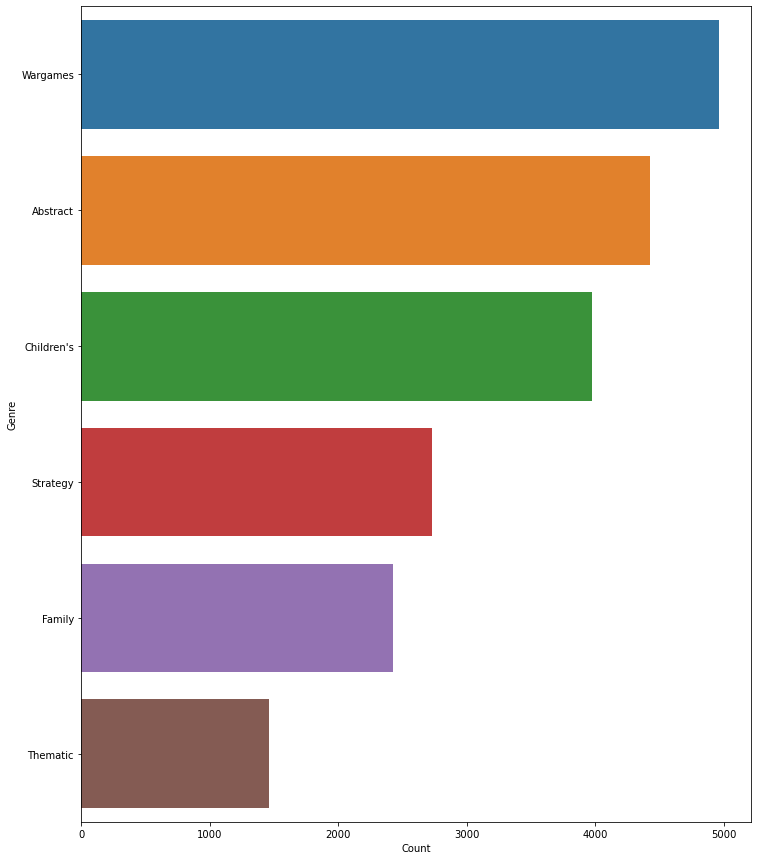

In [23]:
g = all_genres_df.nlargest(columns="Count", n = 50)
plt.figure(figsize=(12,15))
ax = sns.barplot(data=g, x= "Count", y = "Genre")
plt.show()

In [24]:
def word_count(words):
    words = words.replace('  ', ' ')
    words = words.replace('/n','')
    words = words.strip()
    return int(len(words.split(' ')))

In [25]:
for i in df.index:
    df.loc[ df.index == i, 'word_count' ] = word_count(df.loc[i, 'description'])
    print(f'       {i}',end='\r')
df = df.astype({'word_count': 'int64'})

In [26]:
df

,name,description,types,categories,word_count
0,Gloomhaven,gloomhaven is a game of euro inspired tactical...,"[Strategy, Thematic]","[Adventure, Exploration, Fantasy, Fighting, Mi...",272
1,Pandemic Legacy: Season 1,pandemic legacy is a co operative campaign gam...,"[Strategy, Thematic]","[Environmental, Medical]",333
2,Gloomhaven: Jaws of the Lion,gloomhaven jaws of the lion is a standalone ga...,"[Strategy, Thematic]","[Adventure, Exploration, Fantasy, Fighting, Mi...",186
3,Twilight Imperium: Fourth Edition,twilight imperium fourth edition is a game of ...,"[Strategy, Thematic]","[Civilization, Economic, Exploration, Negotiat...",444
4,Star Wars: Rebellion,star wars rebellion is a board game of epic co...,[Thematic],"[Civil, Fighting, Miniatures, Movies, Science,...",406
...,...,...,...,...,...
18358,Knights Poker,knights poker is the new board game from the w...,[Abstract],[Abstract],54
18359,Gekitai,gekitai repel or push away is a in a row game ...,[Abstract],"[Abstract, Print]",146
18360,Gekitai²,gekitai repel or push away is a in a row game ...,[Abstract],"[Abstract, Print]",173
18361,Digit Draughts,digit draughts is a set of three related games...,[Abstract],"[Abstract, Number]",226


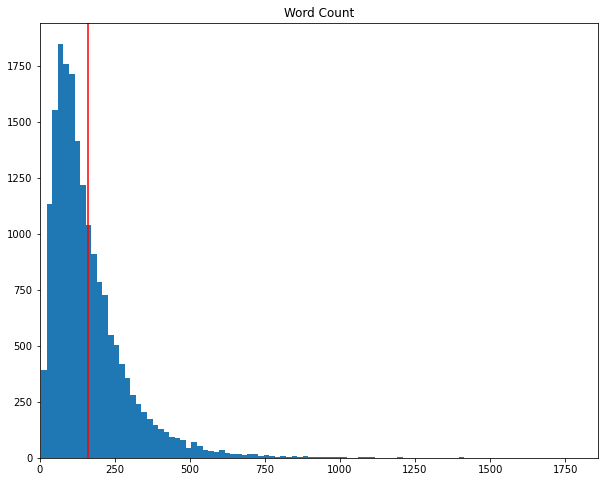

In [27]:
plt.figure(figsize=(10,8))
plt.title('Word Count')
plt.hist(df['word_count'], bins=100)
plt.axvline(df['word_count'].mean(), c='red', label='Mean')
plt.xlim((0,df['word_count'].max()));